<a href="https://colab.research.google.com/github/Sptfff/ADA-Informes/blob/main/Informe5_BucketSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problemas de Ordenamiento

**Entrada:** Secuencia de números de tamaño *N*:  $[a_1,a_2,...,a_n]$

**Salida:** Cambio ordenado de la secuencia de entrada: $[a_1',a_2',...,a_n']$, de modo que la secuencia final siga el orden $a_1'\leq a_2' \leq... \leq a_n'$.

![image](https://imgur.com/3IzqosC.jpg)

Los problemas de ordenamiento siempre han sido "complejos" de completar, ya sea por problema de espacio o por un gran número de lo que se desea ordenar.
Por ejemplo en computación siempre se ha buscado la forma más eficiente de ordenar datos, como podría ser una sucesión númerica.

Y aunque a primera vista esto parece un problema sencillo de solucionar, su mayor problema radica en su eficiencia, ya que, aunque la sucesión sea pequeña, la mayoria de algoritmos necesito un gran número de iteraciones para ordenar todo.


#2. Descripción del Bucket Sort

Esta implementación de Bucket Sort consiste en crear en una cantidad de *bucket* los cuales, almacenan los elementos del arreglo original. Y cada *bucket* consiste en un rango, por lo que todos elementos originales se encuentren dentro del rango de un *bucket* irá se guardara en ese. Por ejemplo:

$a = [0.123, 0.198, 0.234]$

En este caso Bucket sort crea los *buckets* que se utilizaran, en el primero, se guardaran los valores que se encuentran en el rango $[0.1 - 0.2[$ por lo que se guaradaran los valores $0.123$ $y$ $0.198$ mientras que $0.234$ se guardaría en el *bucket* siguiente.



##2.1 Propiedades de Bucket Sort

Bucket Sort recibe un arreglo $a$ el cual contiene elementos que se encuentran entre $[0,1[$. Y este arreglo se busca ordenar usando los *buckets* y una función auxiliar.

1. Bucket Sort, divide de cierto modo el arreglo que recibe, ya que toma los elementos de cierto rango y los almacena en un *bucket*.

2. Los *buckets* son arreglos que se encuentran dentro de un arreglo auxiliar, y estos son los que almacenan los elementos y que posteriormente serán ordenados.

3. La función auxiliar es un algoritmo de ordenamiento, en teoria puede ser cualquier algoritmo que realice esta tarea, pero es usual que se use `Insertion Sort` ya que esta es sencilla de implementar, y dado que los *buckets* no poseen una gran cantidad de datos, el tiempo de ejecución de `Insertion` no es muy alto.

# 3. Correctitud

## Bucket Sort

### **Teorema (Correctitud).**

Bucket Sort ordena un arreglo recibido $P(n)=[a_1, a_2,...,a_n]$, pero conservando todos los elementos originales pero ordenados de menor a mayor de modo que: $P(n) =[a_1\leq a_2 \leq... \leq a_n]$.

## **Prueba del Teorema**

Para comprobar el teorema haremos uso de la inducción matemática.

    Para esto vamos a probar que el teorema sea cierto y aplicable a todos los
    casos utilizando 2 casos solamente, 1 simple (Caso base) y un caso
    cualquiera que sea valido para el último caso.


El teorema dice que el algoritmo retorna un arreglo ordenado de $n$ elementos, los cuales son los mismos que el arreglo recibido originalmente. Siendo todos estos números que pertenecen al intervalo $[0,1[$

> **Como nota importante antes de seguir, asumiremos que Insertion Sort es correcto.**
### Caso base

Como caso base, será que Bucket Sort recibe un arreglo con 1 elemento.

Bucket Sort al recibir este arreglo, creará 10 *buckets* donde se almacenará este elemento en el intervalo que le corresponda. Al finalizar este proceso, se llama a Insertion Sort que ordena el *bucket* que contiene el elemento.

Con el *bucket* ordenado, se reintegrarán los elementos al arreglo original, al haber solo 1 elemento en los buckets, y este se reintegró al arreglo, el arreglo queda ordenado.


### **Caso estándar**

Ahora veremos un caso cualquiera del Bucket Sort recibe una secuencia de  elementos.
En este caso Bucket Sort recibira un arreglo $P(n)$ donde $n$ es el largo del arreglo.

Repitiendo parte del proceso Bucket Sort distribuirá los elementos del arreglo recibido en los intervalos de cada bucket, de modo que:

>El bucket $B[i]$ contendrá elementos desde $0.i$ hasta $0.i + 0.1$, o lo que es igual: $\frac{i}{10} \leq B[i] < \frac{i+1}{10}$ 

Luego de que se asignen los elementos a sus *buckets* correspondientes, se llamará a `Insertion Sort` para que este ordene cada *bucket*.

Después del ordenamiento, y asumiendo en base de que `Insertion Sort` es correcto, todos los *buckets* han sidos ordenados correctamente, por lo que ahora se recorre el arreglo original junto con los buckets y se van "pasando" los datos de un arreglo a otro.

>Tomando que $A$ es el arreglo original y $B$ es el único bucket ordenado:

>>$A[k]$ cambia de valor con $B[i][j]$ donde $k$ es el subíndice que se cambiara de $A$. Mientras que $i$ es el *bucket* que guarda al valor que se encuentra en $j$.

El arreglo original, después de los cambios cumple la propiedad invariable de bucle.






#4. Tiempo de ejecución

##Mejor caso:

Este se da cuando los datos ya están ordenados, de manera que en cada bucket creado se necesite un tiempo lineal, siendo n el tiempo requerido para crear los buckets y k para aplicar insertion sort a cada bucket, resultando en un tiempo de ejecución total de O(n+k).

##Peor caso:

Si los elementos del arreglo están en un mismo rango, todos serán ubicados en un mismo bucket, y si además se encuentran en orden inverso, nos dará una complejidad temporal de O(n^2).

#5. Código

##Código Bucket Sort

In [2]:
import random
import math
from termcolor import colored

def insertionSort(b):
    for i in range(1, len(b)):
        up = b[i]
        j = i - 1
        while j >= 0 and b[j] > up: 
            b[j + 1] = b[j]
            j -= 1
        b[j + 1] = up     
    return b     
              
def bucketSort(arr, verbose = False, integers = False):
    aux = []
    numCasilla = 10 #Esta variable crea un arreglo de tamaño 10 para cada subíndice (cada arreglo del subíndice es un bucket)

    for i in range(numCasilla):
      aux.append([]) #agrega un bucket en cada subíndice del arreglo
          
################################################################################################################################################
    if (integers == True):
      for j in arr: # Cada posición de j, es el valor del subíndice donde se encuentra

        if (verbose == True):
          print(colored(f"\nSe ve el primer digito de: {j}", "blue"))

        index_b = int(j / 10 ** int(math.log10(j)))

        if (j < 10):
          if (verbose == True):
            print(colored(f"Como es un número menor 10, se asigna al bucket 0", "blue"))

          index_b = 0
        print(colored(f"{index_b}", "red"))

        if (verbose == True):
          print(colored(f"Se obtiene que el valor {j} va en el bucket {index_b}", "blue"))

        aux[index_b].append(j)
    else:

      for j in arr: # Cada posición de j, es el valor del subíndice donde se encuentra
          index_b = int(numCasilla * j) 
          if(index_b >= len(aux)):
            exit()

          if (verbose == True):
            print(colored(f"Tomando la cantidad de casillas ({numCasilla})", "blue"))
            print(colored(f"Se multiplica con el valor {j}", "blue"))
            print(colored(f"\nSe obtiene que el valor {j} se guardara en el bucket: {index_b}", "blue"))

          aux[index_b].append(j)

    if(verbose == True):
      print(colored(f"El arreglo queda como:\n {aux}", "magenta"))
      
    ####################################################################################################################################
    for i in range(numCasilla):
        if(verbose == True):
          print(colored(f"\nSe llama a Insertion Sort para ordenar el bucket {i}: {aux[i]}", "yellow"))
        
        aux[i] = insertionSort(aux[i]) #Llama a insertion sort para ordenar cada bucket
        
        if(verbose == True):
          print(colored(f"El bucket queda como {aux[i]}", "green"))
    #################################################################################################################################
    k = 0

    if(verbose == True):
      print(colored(f"\nDado que los buckets ya se encuentran ordenados,","yellow")) 
      print(colored(f"ahora se recorrerá el arreglo original, yse irán agregando los valores de los buckets de manera ordenada:\n", "yellow"))

    for i in range(numCasilla):
        for j in range(len(aux[i])):

            if(verbose == True):
              print(colored(f"En la casilla", "yellow"), colored(f"{k}","green"), colored(f" del arreglo orignal. Se guardara el valor:", "yellow"), colored(f"{aux[i][j]}", "green") )
            
            arr[k] = aux[i][j]
            k += 1
    return arr
  
# Driver Code

#x = [0.897, 0.565, 0.656, 0.1234, 0.665, 0.3434, 0.435,0.25] 
arr = []
n = random.randint(3,15)
for i in range(0, n):
  arr.append(round(random.random(), 3))
#arr = random.sample(range(1, 99), 15)

print(colored(f"Arreglo recibido: \n{arr}\n", "blue"))
bucketSort(arr)
print(colored(f"\nArreglo ordenado\n {arr}", "green" ))

Arreglo recibido: 
[0.795, 0.038, 0.637, 0.939, 0.954, 0.819, 0.871, 0.371]


Arreglo ordenado
 [0.038, 0.371, 0.637, 0.795, 0.819, 0.871, 0.939, 0.954]


##Ejecución Paso a paso (verbose = True)

In [5]:
arr = []
for i in range(0, 20):
  arr.append(round(random.random(), 3))
print(colored(f"Arreglo recibido{arr}\n", "green"))
bucketSort(arr, True)
print(colored(f"\nArreglo ordenado: {arr}", "green"))

Arreglo recibido[0.175, 0.917, 0.312, 0.978, 0.28, 0.805, 0.025, 0.761, 0.478, 0.892, 0.27, 0.992, 0.758, 0.271, 0.94, 0.89, 0.293, 0.206, 0.47, 0.342]

Tomando la cantidad de casillas (10)
Se multiplica con el valor 0.175

Se obtiene que el valor 0.175 se guardara en el bucket: 1
El arreglo queda como:
 [[], [0.175], [], [], [], [], [], [], [], []]
Tomando la cantidad de casillas (10)
Se multiplica con el valor 0.917

Se obtiene que el valor 0.917 se guardara en el bucket: 9
El arreglo queda como:
 [[], [0.175], [], [], [], [], [], [], [], [0.917]]
Tomando la cantidad de casillas (10)
Se multiplica con el valor 0.312

Se obtiene que el valor 0.312 se guardara en el bucket: 3
El arreglo queda como:
 [[], [0.175], [], [0.312], [], [], [], [], [], [0.917]]
Tomando la cantidad de casillas (10)
Se multiplica con el valor 0.978

Se obtiene que el valor 0.978 se guardara en el bucket: 9
El arreglo queda como:
 [[], [0.175], [], [0.312], [], [], [], [], [], [0.917, 0.978]]
Tomando la cantidad

#6. Experimentación

##Comparación con Radix Sort y Counting Sort

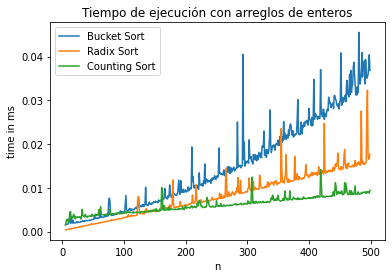

In [14]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random
import math

def insertionSort(b):
    for i in range(1, len(b)):
        up = b[i]
        j = i - 1
        while j >= 0 and b[j] > up: 
            b[j + 1] = b[j]
            j -= 1
        b[j + 1] = up     
    return b   

def bucketSort3(arr, verbose = False):
    aux = []
    cont = [0]
    numCasilla = 100 
    for i in range(numCasilla):
      aux.append([]) #agrega un bucket en cada subíndice del arreglo
    for j in arr: # Cada posición de j, es el valor del subíndice donde se encuentra
        index_b = int(j / 10 ** int(math.log10(j)))
        if (j < 10):
          index_b = 0
        
        aux[index_b].append(j)
    for i in range(numCasilla):
        aux[i] = insertionSort(aux[i]) #Llama a insertion sort para ordenar cada bucket
    k = 0
    for i in range(numCasilla):
        for j in range(len(aux[i])):
            arr[k] = aux[i][j]
            k += 1
    return arr

def count_sort(arr):
    max_element = int(max(arr))
    min_element = int(min(arr))
    range_of_elements = max_element - min_element + 1
    count_arr = [0 for _ in range(range_of_elements)]
    output_arr = [0 for _ in range(len(arr))]
 
    for i in range(0, len(arr)):
        count_arr[arr[i]-min_element] += 1
 
    for i in range(1, len(count_arr)):
        count_arr[i] += count_arr[i-1]
    for i in range(len(arr)-1, -1, -1):
        output_arr[count_arr[arr[i] - min_element] - 1] = arr[i]
        count_arr[arr[i] - min_element] -= 1
    for i in range(0, len(arr)):
        arr[i] = output_arr[i]
 
    return arr

def countingSort(arr, exp1):
 
    n = len(arr)
    output = [0] * (n)

    count = [0] * (10)
    for i in range(0, n):
        index = arr[i] // exp1
        count[index % 10] += 1
    for i in range(1, 10):
        count[i] += count[i - 1]
    i = n - 1
    while i >= 0:
        index = arr[i] // exp1
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1
    i = 0
    for i in range(0, len(arr)):
        arr[i] = output[i]
def radixSort(arr):

    max1 = max(arr)

    exp = 1
    while max1 / exp >= 1:
        countingSort(arr, exp)
        exp *= 10

x=[]; y=[]
x1 = []; y1 = []
x2=[]; y2=[]

for n in range(5,500):

  arr = []
  arr = random.sample(range(1, 1000), n)
  # El pivote es el elemento final del arreglo
  t = repeat(setup="from __main__ import bucketSort3", stmt=f"bucketSort3({arr})", repeat=1, number=20)

  x.append(n)
  y.append(t)

for n in range(5,500):

  cont = [0]
  arr = []
  arr = random.sample(range(1, 1000), n)
  # El pivote es el elemento final del arreglo
  t = repeat(setup="from __main__ import radixSort", stmt=f"radixSort({arr})", repeat=1, number=20)

  x1.append(n)
  y1.append(t)

for n in range(5,500):

  cont = [0]
  arr = []
  arr = random.sample(range(1, 1000), n)
  # El pivote es el elemento final del arreglo
  t = repeat(setup="from __main__ import count_sort", stmt=f"count_sort({arr})", repeat=1, number=20)

  x2.append(n)
  y2.append(t)


plt.plot(x,y)
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.title("Tiempo de ejecución con arreglos de enteros")
plt.legend(["Bucket Sort", "Radix Sort", "Counting Sort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

En el gráfico se ve que en caso de que los arreglos sean pequeños Bucket Sort es ligeramente más lento que Radix Sort, aunque se podría deber al proceso que utiliza Bucket para obtener el primer digito del número entero. Esto tambien podría explicar tanto, los saltos constantes en el gráfico, aunque estos tambien se puedan deber a detalles del *hardware*. 

  También el gran aumento que muestra se puede deber al aumento del largo del arreglo que recibe, ya que esto genera de que los buckets sean cada vez mayores, por lo que el recorrido que hace la función auxiliar (en este caso Insertion Sort, sea mayor).

Por otro lado, el counting sort resulta menos eficiente con arreglos de menor tamaño, pero su estabilidad provoca que conforme se alarga los arreglos de prueba, este resulte más eficiente que bucket sort y radix sort

##Comparación tiempo de ejecución con otros metodos de ordenamiento

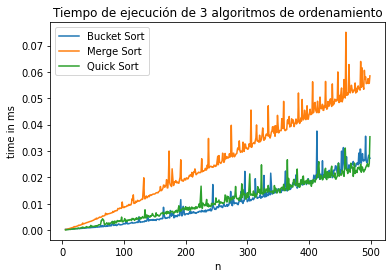

In [5]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

def insertionSort(b):
    for i in range(1, len(b)):
        up = b[i]
        j = i - 1
        while j >= 0 and b[j] > up: 
            b[j + 1] = b[j]
            j -= 1
        b[j + 1] = up     
    return b   

def quickSort(arr, low, high, cont):
    #Condicional fija para que no se ingrese valores que no corresponden, como un arreglo de índice máximo negativo
    #O que el low sea igual al high.
    if(low < high):

        pivote = particion(arr, low, high, cont) # Como la función retorna un índice, este se ocupa para crear el margen para la siguiente parte

        quickSort(arr, low, pivote-1, cont) # Llama a la función para que realiza las operaciones para la parte izquierda del arreglo
        quickSort(arr, pivote+1, high, cont) # Realiza lo mismo pero para la parte derecha del arreglo.



def particion(arr, low, high, cont, verbose = False):
    pivote = arr[high] #El pivote se le asigna el valor del último índice
    topeIzq = low
    for i in range(low, high):
        cont[0] += 1
        #En caso de que la condición no se cumpla, el índice que recorre el arreglo avanza, sin generar cambios en el arreglo.
        if(arr[i] <= pivote): 

            arr[topeIzq], arr[i] = arr[i], arr[topeIzq] # Esta parte correspondería Swap
            topeIzq += 1

    arr[topeIzq], arr[high] = arr[high], arr[topeIzq]

    return topeIzq #Retorna el valor que toma el tope, el cual es índice actual de donde se encuentra el valor del pivote



def bucketProvisional(arr, verbose = False):
    aux = []
    cont = [0]
    numCasilla = 10 #Esta variable crea un arreglo de tamaño 10 para cada subíndice (cada arreglo del subíndice es un bucket)
    for i in range(numCasilla):
      aux.append([]) #agrega un bucket en cada subíndice del arreglo
    for j in arr: # Cada posición de j, es el valor del subíndice donde se encuentra
        index_b = int(numCasilla * j)
        if(index_b > len(aux)):
          exit()
        aux[index_b].append(j)
    for i in range(numCasilla):
        high = len(aux[i])-1
        aux[i] = insertionSort(aux[i]) #Llama a insertion sort para ordenar cada bucket
    k = 0
    for i in range(numCasilla):
        for j in range( len(aux[i]) ):
            arr[k] = aux[i][j]
            k += 1
    return arr

def merge3(izq, der, cont):
  orden = []
  while len(izq) > 0 and len(der) > 0:
    cont[0] += 1
    if izq[0] < der[0]:
      orden.append(izq.pop(0))
    else:
      orden.append(der.pop(0))
  while len(izq) > 0:
    cont[0] += 1
    orden.append(izq.pop(0))
  while len(der) > 0:
    cont[0] += 1
    orden.append(der.pop(0))
  return orden

def merge_sort2(arr, cont):
  if len(arr) <= 1:
    return arr
  else:
    middle = len(arr) // 2
    front = arr[:middle]
    back = arr[middle:]
    front = merge_sort2(front, cont)
    back = merge_sort2(back, cont)
    c = []
    c = merge3(front, back, cont)
    return c

x=[]; y=[]
x1 = []; y1 = []
x2=[]; y2=[]

for n in range(5,500):

  arr = []

  for i in range(0, n):
    k = round(random.random(), 5)
    if(k > 1):
      k -= 1
    arr.append(k)

  # El pivote es el elemento final del arreglo
  t = repeat(setup="from __main__ import bucketProvisional", stmt=f"bucketProvisional({arr})", repeat=1, number=20)

  x.append(n)
  y.append(t)

for n in range(5,500):

  cont = [0]
  arr = []
  for i in range(0, n):
    arr.append(round(random.random(), 5))
  # El pivote es el elemento final del arreglo
  t = repeat(setup="from __main__ import merge_sort2", stmt=f"merge_sort2({arr}, {cont})", repeat=1, number=20)

  x1.append(n)
  y1.append(t)

for n in range(5,500):

  cont = [0]
  arr = []
  for i in range(0, n):
    arr.append(round(random.random(), 5))

  high = len(arr)-1
  low = 0
  # El pivote es el elemento final del arreglo
  t = repeat(setup="from __main__ import quickSort", stmt=f"quickSort({arr},{low}, {high}, {cont})", repeat=1, number=20)

  x2.append(n)
  y2.append(t)

plt.plot(x,y)
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.title("Tiempo de ejecución de 3 algoritmos de ordenamiento")
plt.legend(["Bucket Sort", "Merge Sort", "Quick Sort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

En este gráfico se ve el tiempo de ejecución de 3 algoritmos de ordenamiento, todos en sus casos promedios.

Como detalles a destacar se puede apreciar como Merge Sort es el más "lento" de todos, esto debido al proceso reiterativo que tiene, aunque esto no es una desventaja en realidad debido a que este constante como se mencionó en los informes anteriores.

Otro punto es el tiempo de ejecución similar de Quick Sort y Bucket Sort, esto se puede deber a que en cierto modo operan de forma similar, ya que ambos algoritmos comienzan a "simplificar" sus problemas, debido a que ambos comienzan a dividir el arreglo original que reciben, Quick Sort por medio de sus limites y el pivote, mientras que Bucket Sort a través de de sus *buckets*.
Por lo que el tiempo de ejecución se puede asemejar por ese punto.